# <a id='toc1_'></a>[Rozdział 5. Rozwiązywanie równań](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 5. Rozwiązywanie równań](#toc1_)    
  - [Algebra Liniowa — Układy równań liniowych](#toc1_1_)    
    - [Podejście symboliczne](#toc1_1_1_)    
    - [Podejście numeryczne](#toc1_1_2_)    
    - [Przykład: Wpływ wartości p na błąd względny rozwiązania i wartość współczynnika uwarunkowania](#toc1_1_3_)    
    - [Układy z macierzą prostokątną](#toc1_1_4_)    
    - [Układy niedookreślone](#toc1_1_5_)    
    - [Układy nadokreślone: metoda najmniejszych kwadratów](#toc1_1_6_)    
  - [Problem wartości własnych](#toc1_2_)    
  - [Równania nieliniowe](#toc1_3_)    
    - [Równania jednej zmiennej](#toc1_3_1_)    
    - [Metody symboliczne](#toc1_3_2_)    
    - [Metoda bisekcji](#toc1_3_3_)    
    - [Poszukiwanie pierwiastków z wykorzystaniem `scipy.optimize`](#toc1_3_4_)    
    - [Funkcje wielu zmiennych](#toc1_3_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)

In [1]:
import matplotlib.pyplot as plt

from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing(pretty_print=True)
# sympy.init_printing(pretty_print=False)

import numpy as np

## <a id='toc1_1_'></a>[Algebra Liniowa — Układy równań liniowych](#toc0_)

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

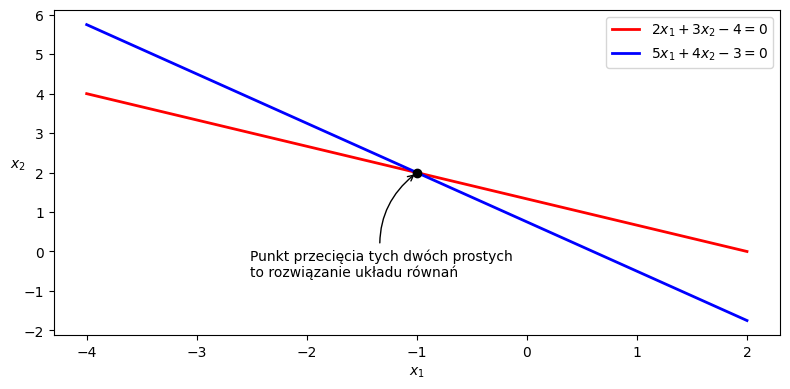

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label="$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label="$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("Punkt przecięcia tych dwóch prostych\nto rozwiązanie układu równań",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$", rotation=0)
ax.legend();

fig.tight_layout()

### <a id='toc1_1_1_'></a>[Podejście symboliczne](#toc0_)

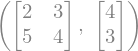

In [48]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A, b

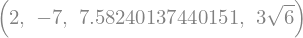

In [49]:
A.rank(), A.det(), sympy.N(A.condition_number()), A.norm()

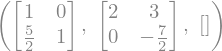

In [52]:
L, U, P = A.LUdecomposition()
L, U, P

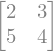

In [54]:
L * U

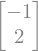

In [55]:
x = A.solve(b) # Odpowiednik wywołania A.LUsolve(b)
x

### <a id='toc1_1_2_'></a>[Podejście numeryczne](#toc0_)

In [56]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
A, b

(array([[2, 3],
        [5, 4]]),
 array([4, 3]))

In [57]:
np.linalg.matrix_rank(A), np.linalg.det(A), np.linalg.cond(A), np.linalg.norm(A)

(2, -6.999999999999999, 7.582401374401516, 7.3484692283495345)

In [58]:
P, L, U = la.lu(A)
P, L, U, type(L)

(array([[0., 1.],
        [1., 0.]]),
 array([[1. , 0. ],
        [0.4, 1. ]]),
 array([[5. , 4. ],
        [0. , 1.4]]),
 numpy.ndarray)

In [59]:
P @ L @ U

array([[2., 3.],
       [5., 4.]])

In [61]:
la.solve(A, b)

array([-1.,  2.])

### <a id='toc1_1_3_'></a>[Przykład: Wpływ wartości p na błąd względny rozwiązania i wartość współczynnika uwarunkowania](#toc0_)

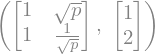

In [68]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
A, b

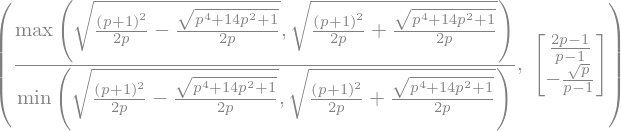

In [71]:
x = A.solve(b)
x.simplify()
Acond = A.condition_number()
Acond.simplify()
Acond, x

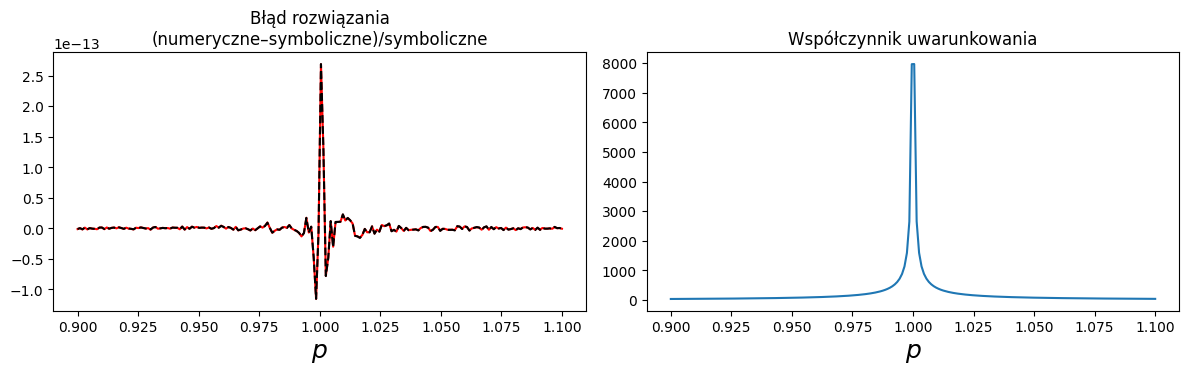

In [82]:
# Symboliczna specyfikacja problemu
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Rozwiązanie symboliczne
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
Acond = A.condition_number().simplify()

# Funkcje do rozwiązania numerycznego
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Wykreślenie różnic pomiędzy symbolicznym (dokładnym) rozwiązaniem a rozwiązaniami numerycznymi
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

style = ['r-', 'k--']
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, style[n])
axes[0].set_title("Błąd rozwiązania\n(numeryczne–symboliczne)/symboliczne")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Współczynnik uwarunkowania")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()

### <a id='toc1_1_4_'></a>[Układy z macierzą prostokątną](#toc0_)

### <a id='toc1_1_5_'></a>[Układy niedookreślone](#toc0_)

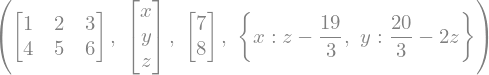

In [87]:
unknown = sympy.symbols("x, y, z")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(unknown)
b = sympy.Matrix([7, 8])
sol = sympy.solve(A*x - b, unknown)
A, x, b, sol

### <a id='toc1_1_6_'></a>[Układy nadokreślone: metoda najmniejszych kwadratów](#toc0_)

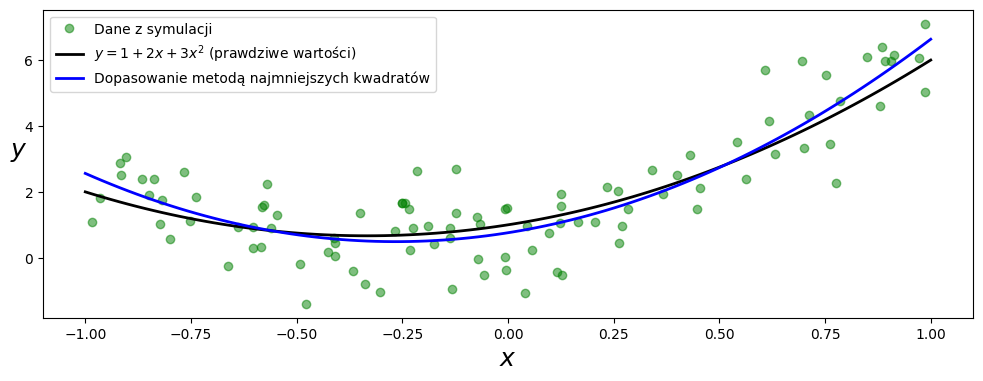

In [89]:
np.random.seed(1234)

# Rzeczywiste parametry modelu
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# Symulacja zaszumionych danych
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# Dopasowanie modelu do danych z użyciem metody najmniejszych kwadratów
A = np.vstack([X**0, X**1, X**2])  # Zamiast vstack można również wykorzystać np.vander
A = A.T

sol, r, rank, sv = la.lstsq(A, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Dane z symulacji')
ax.plot(x, y_exact, 'k', lw=2, label='$y = 1 + 2x + 3x^2$ (prawdziwe wartości)')
ax.plot(x, y_fit, 'b', lw=2, label='Dopasowanie metodą najmniejszych kwadratów')
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc=2);

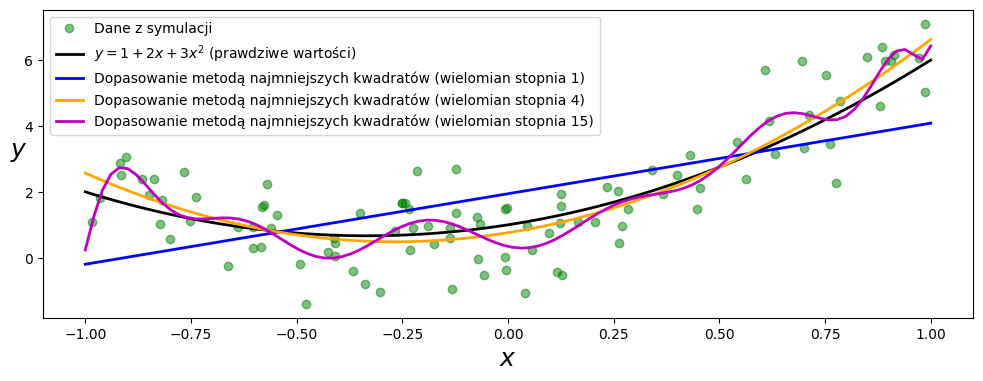

In [106]:
# Dopasowywanie modelu z wykorzystaniem metody najmniejszych kwadratów
# Wielomian stopnia 1
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# Wielomian stopnia 4
A = np.vstack([X**n for n in range(4)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit4 = sum([s * x**n for n, s in enumerate(sol)])

# Wielomian stopnia 15
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Dane z symulacji')
ax.plot(x, y_exact, 'k', lw=2, label='$y = 1 + 2x + 3x^2$ (prawdziwe wartości)')
ax.plot(x, y_fit1, 'b', lw=2, label='Dopasowanie metodą najmniejszych kwadratów (wielomian stopnia 1)')
ax.plot(x, y_fit4, 'orange', lw=2, label='Dopasowanie metodą najmniejszych kwadratów (wielomian stopnia 4)')
ax.plot(x, y_fit15, 'm', lw=2, label='Dopasowanie metodą najmniejszych kwadratów (wielomian stopnia 15)')
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc=2);

## <a id='toc1_2_'></a>[Problem wartości własnych](#toc0_)

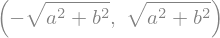

In [91]:
a, b = sympy.symbols("a, b")
H = sympy.Matrix([[a, b], [b, -a]])

eval1, eval2 = H.eigenvals()
eval1, eval2

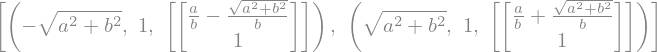

In [92]:
H.eigenvects()

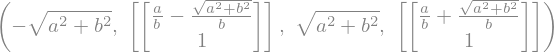

In [94]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
eval1, evec1, eval2, evec2

In [95]:
sympy.simplify(evec1[0].T * evec2[0]) # ortogonalność wektorów własnych

In [96]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
A

array([[1, 3, 5],
       [3, 5, 3],
       [5, 3, 9]])

In [97]:
evals, evecs = la.eig(A)

In [98]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [99]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

## <a id='toc1_3_'></a>[Równania nieliniowe](#toc0_)

### <a id='toc1_3_1_'></a>[Równania jednej zmiennej](#toc0_)

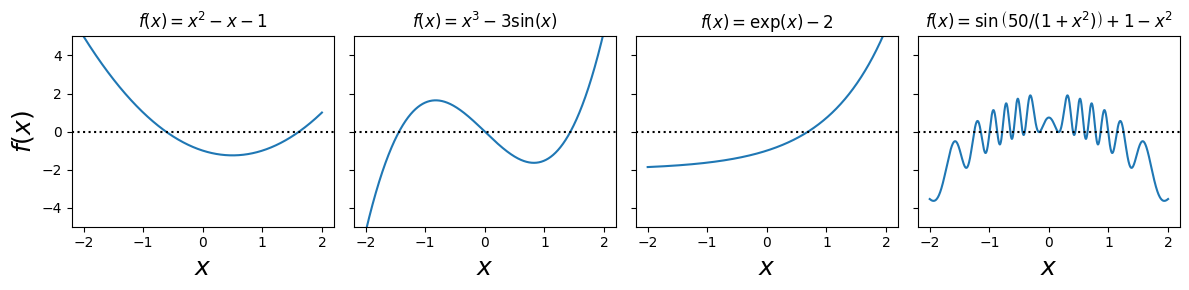

In [5]:
x = np.linspace(-2, 2, 1000)

# Cztery przykładowe funkcje nieliniowe
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# Wykreślanie każdej funkcji
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
fig.tight_layout()

### <a id='toc1_3_2_'></a>[Metody symboliczne](#toc0_)

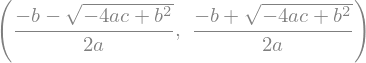

In [8]:
x, a, b, c = sympy.symbols("x, a, b, c")
e = a*x**2 + b*x + c
sol1, sol2 = sympy.solve(e, x)
sol1, sol2

In [9]:
e.subs(x, sol1).expand(), e.subs(x, sol2).expand()

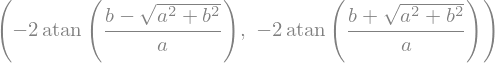

In [10]:
e = a * sympy.cos(x) - b * sympy.sin(x)
sol1, sol2 = sympy.solve(e, x)
sol1, sol2

In [11]:
e.subs(x, sympy.atan(a/b))

In [12]:
e.subs(x, sol1).simplify()

In [13]:
e.subs(x, sol2).simplify()

In [14]:
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

### <a id='toc1_3_3_'></a>[Metoda bisekcji](#toc0_)

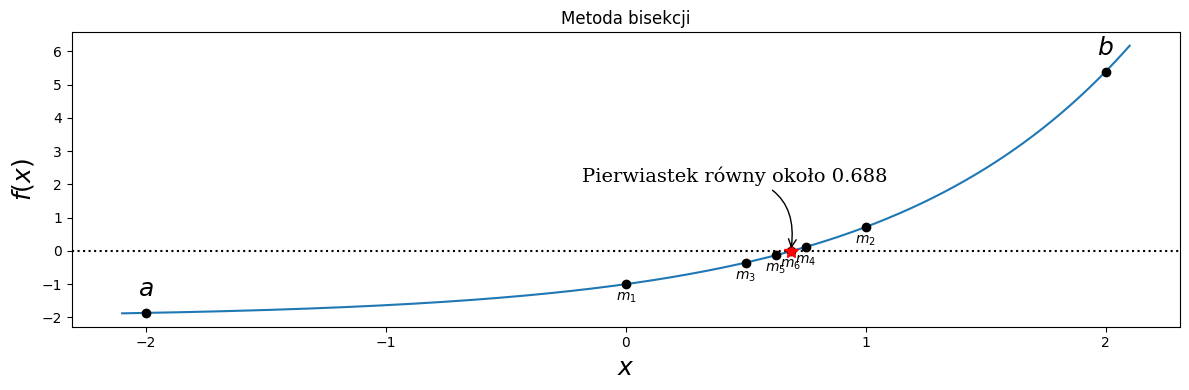

In [15]:
# Definicja funkcji, określenie dokładności i przedziału początkowego [a, b]
x = np.linspace(-2.1, 2.1, 1000)
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2


# Wykres funkcji f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# Poszukiwanie pierwiastka metodą bisekcji wraz z 
# zaznaczaniem kolejnych kroków na wykresie
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, f"$m_{n}$", ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Pierwiastek równy około %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Metoda bisekcji")

fig.tight_layout()

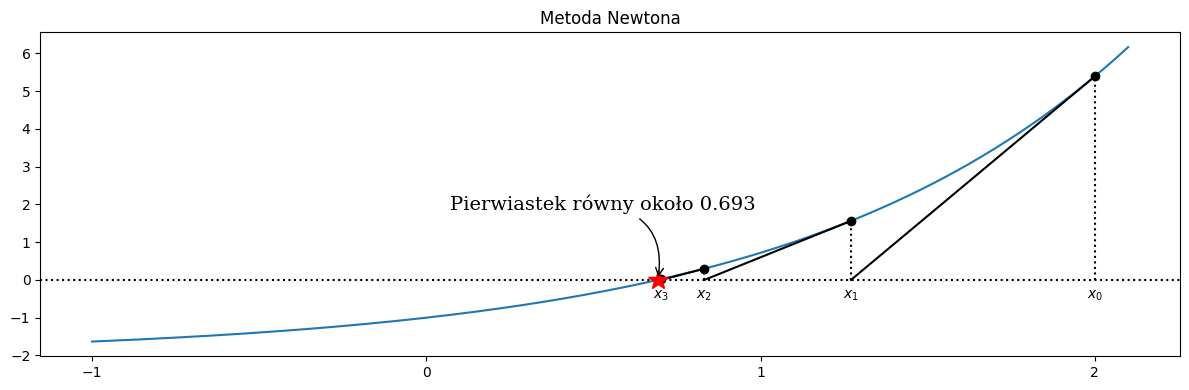

In [16]:
# Definicja funkcji, określenie dokładności i punktu startowego xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# Tworzenie wykresu do wizualizacji kolejnych kroków
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# Metoda Newtona jest powtarzana, aż do osiągnięcia zadanej dokładności
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Pierwiastek równy około %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Metoda Newtona")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()

### <a id='toc1_3_4_'></a>[Poszukiwanie pierwiastków z wykorzystaniem `scipy.optimize`](#toc0_)

In [2]:
# Matoda bisekcji
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2, )

In [9]:
x_root_guess = 2
f = lambda x: np.exp(x) - 2
Df = lambda x: np.exp(x)

# Secant method
sol1 = optimize.newton(f, x_root_guess)

# Newton's method
sol2 = optimize.newton(f, x_root_guess, fprime=Df)

sol1, sol2

In [10]:
# Brent's method
# hybrid root-finding algorithm combining the bisection method, the secant method and inverse quadratic interpolation
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

### <a id='toc1_3_5_'></a>[Funkcje wielu zmiennych](#toc0_)

In [14]:
f = lambda x: [
  x[1] - x[0]**3 - 2 * x[0]**2 + 1,
  x[1] + x[0]**2 - 1
]

optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

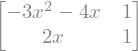

In [15]:
x, y = sympy.symbols("x, y")
f_sym = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_sym.jacobian(sympy.Matrix([x, y]))

In [17]:
Df = lambda x:[
    [-3*x[0]**2-4*x[0], 1],
    [2*x[0], 1]
]

optimize.fsolve(f, [1, 1], fprime=Df)

array([0.73205081, 0.46410162])

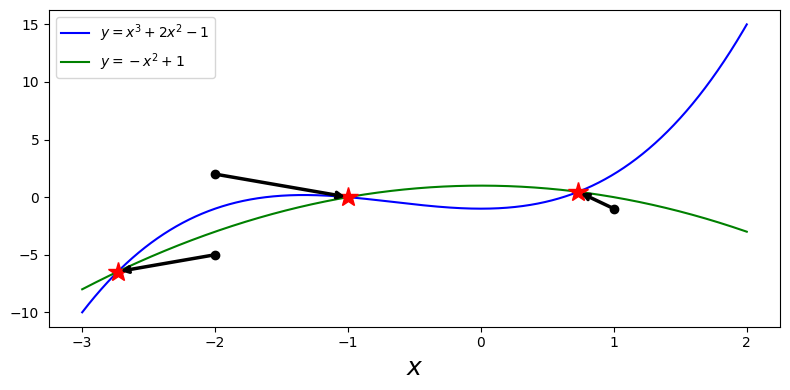

In [18]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]     
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()

C:\Users\Antoni\AppData\Local\Temp\ipykernel_9780\1591487006.py:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = optimize.fsolve(f, x_guess)


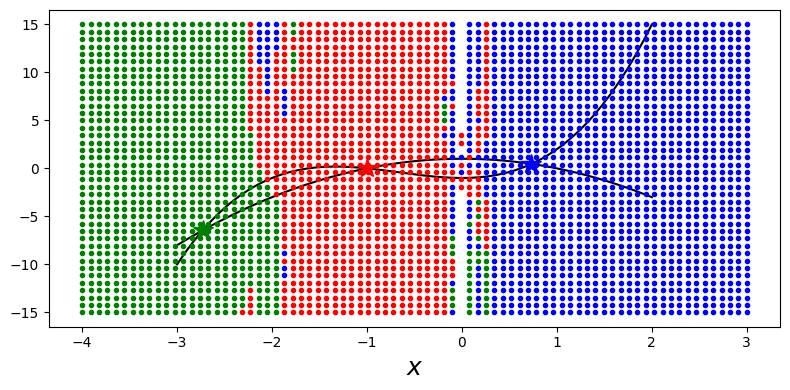

In [20]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
            x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])
colors = ['r', 'b', 'g']
for idx, s in enumerate([sol1, sol2, sol3]):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                # ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout();